	
## LAB TASK # 05 !!!

---



# *Use BFS code to implement Uniform Cost Search Algorithm*
	
1.  -add extra check to explore only that node which has minimum cost

2.   add extra list named as "visite_node" to avoid the same node visiting repeatedly


	.

# *Use DFS code to implement Depth-Limited First Search and Iterative Deepening First Search*


1.   -write a fu/nction to find depth of given node
2.   -use this function for depth limited 


	
	



# ***Uniform Cost Search Algorithm***

In [ ]:
class WeightedDiGraph: 
    def __init__(self): 
        self.g = {} 
        
    def add_node(self, node): 
        if node in self.g: 
            raise ValueError("Node already in graph")
            
        self.g[node] = [] 

    def add_edge(self, src, dest, weight): 
        if src not in self.g: 
            raise ValueError("Source node not in graph")
        if dest not in self.g: 
            raise ValueError("Destination node not in graph")
            
        nexts = self.g[src]
        if dest in nexts: 
            return 
        
        nexts.append((dest, weight))
g = WeightedDiGraph() 

nodes = ['a', 'b', 'c', 'd', 'e', 'f'] 

for n in nodes: 
    g.add_node(n) 

edges = [
    ('a', 'b', 5),
    ('a', 'c', 1),
    ('b', 'c', 7),
    ('b', 'd', 8),
    ('c', 'd', 3),
    ('d', 'c', 4),
    ('e', 'f', 8),
    ('f', 'c', 7)
]

for e in edges: 
    g.add_edge(e[0], e[1], e[2])

In [22]:

import heapq

class PriorityQueue:

	def __init__(self):
		self._queue = []
		self._index = 0

	def insert(self, item, priority):
		heapq.heappush(self._queue, (priority, self._index, item))
		self._index += 1

	def remove(self):
		return heapq.heappop(self._queue)[-1]

	def is_empty(self):
		return len(self._queue) == 0




# class that represents a node
class Node:

	def __init__(self, key):
		# self.key is the key of node (unique)
		# self.successors are the successors nodes
		# self.weight_successors represents weight of edges
		self.key, self.successors, self.weight_successors = key, [], {}

	# return the key
	def getKey(self):
		return self.key

	# return the successors of node
	def getSuccessors(self):
		return self.successors

	# add a node successor passing the node and the weight
	def addSuccessor(self, node, weight):
		# adds if successor node not exists
		if node.getKey() not in self.weight_successors:
			self.successors.append(node)
			self.weight_successors[node.getKey()] = weight

	# returns weight of successors
	def getWeightSuccessors(self):
		return self.weight_successors



# class that represents a graph
class Graph:

	def __init__(self):
		self.nodes = {} # key: key of node, value: instance of Node

	# adds a node in the graph passing a key
	def addNode(self, key_node):
		if key_node in self.nodes: # checks if the key already exists
			print('Error: key %s already exists!!' % key_node)
		else:
			node = Node(key_node) # creates a instance of Node
			self.nodes[key_node] = node # stores the node

	# connects the nodes
	def connect(self, key_source, key_destination, weight):
		# checks if the keys exists in the graph
		if key_source in self.nodes and key_destination in self.nodes:
			if key_source != key_destination: # checks if the keys are differents
				if weight > 0: # checks if the weight is positive
					# connects the nodes
					self.nodes[key_source].addSuccessor(self.nodes[key_destination], weight)
				else:
					print('Error: weight negative!!')
			else:
				print('Error: same keys!!')
		else:
			print('Error: key not exists!!')


	# returns weight of edge 
	def getWeightEdge(self, key_source, key_successor):
		if key_source in self.nodes and key_successor in self.nodes: # checks if the keys exists
			if key_source != key_successor: # checks if the keys are differents
				weight_successors = self.nodes[key_source].getWeightSuccessors()
				if key_successor in weight_successors: # checks if key_successor is a successor
					return weight_successors[key_successor] # returns the weight
				else:
					print('Error: successor not exists!!')
			else:
				print('Error: same keys!!')
		else:
			print('Error: key not exists!!')


	# returns the keys of all successors of a node
	def getSuccessors(self, key_node):
		if key_node in self.nodes:
			nodes = self.nodes[key_node].getSuccessors()
			keys_successors = [node.getKey() for node in nodes]
			return keys_successors
		else:
			print('Error: key not exists!!')


	# returns all nodes
	def getNodes(self):
		return self.nodes


In [23]:

import time

def run(graph, key_node_start, key_node_goal, verbose=False, time_sleep=0):
	if key_node_start not in graph.getNodes() or key_node_goal not in graph.getNodes():
		print('Error: key_node_start \'%s\' or key_node_goal \'%s\' not exists!!' % (key_node_start, key_node_goal))
	else:
		# UCS uses priority queue, priority is the cumulative cost (smaller cost)
		queue = PriorityQueue()

		# expands initial node

		# get the keys of all successors of initial node
		keys_successors = graph.getSuccessors(key_node_start)

		# adds the keys of successors in priority queue
		for key_sucessor in keys_successors:
			weight = graph.getWeightEdge(key_node_start, key_sucessor)
			# each item of queue is a tuple (key, cumulative_cost)
			queue.insert((key_sucessor, weight), weight)


		reached_goal, cumulative_cost_goal = False, -1
		while not queue.is_empty():
			# remove item of queue, remember: item of queue is a tuple (key, cumulative_cost)
			key_current_node, cost_node = queue.remove() 
			if(key_current_node == key_node_goal):
				reached_goal, cumulative_cost_goal = True, cost_node
				break

			if verbose:
				# shows a friendly message
				print('Expands node \'%s\' with cumulative cost %s ...' % (key_current_node, cost_node))
				time.sleep(time_sleep)

			# get all successors of key_current_node
			keys_successors = graph.getSuccessors(key_current_node)

			if keys_successors: # checks if contains successors
				# insert all successors of key_current_node in the queue
				for key_sucessor in keys_successors:
					cumulative_cost = graph.getWeightEdge(key_current_node, key_sucessor) + cost_node
					queue.insert((key_sucessor, cumulative_cost), cumulative_cost)

		if(reached_goal):
			print('\nReached goal! Cost: %s\n' % cumulative_cost_goal)
		else:
			print('\nUnfulfilled goal.\n')


if __name__ == "__main__":

	# build the graph...
	# adds nodes in the graph
	graph = Graph()
	graph.addNode('S') # start
	graph.addNode('a')
	graph.addNode('b')
	graph.addNode('c')
	graph.addNode('d')
	graph.addNode('e')
	graph.addNode('f')
	graph.addNode('G') # goal
	graph.addNode('h')
	graph.addNode('p')
	graph.addNode('q')
	graph.addNode('r')
	# linking the nodes
	graph.connect('S', 'd', 3)
	graph.connect('S', 'e', 9)
	graph.connect('S', 'p', 1)
	graph.connect('b', 'a', 2)
	graph.connect('c', 'a', 2)
	graph.connect('d', 'b', 1)
	graph.connect('d', 'c', 8)
	graph.connect('d', 'e', 2)
	graph.connect('e', 'h', 8)
	graph.connect('e', 'r', 2)
	graph.connect('f', 'c', 3)
	graph.connect('f', 'G', 2)
	graph.connect('h', 'p', 4)
	graph.connect('h', 'q', 4)
	graph.connect('p', 'q', 15)
	graph.connect('r', 'f', 1)

	run(graph=graph, key_node_start='S', key_node_goal='G', verbose=True, time_sleep=2)


Expands node 'p' with cumulative cost 1 ...
Expands node 'd' with cumulative cost 3 ...
Expands node 'b' with cumulative cost 4 ...
Expands node 'e' with cumulative cost 5 ...
Expands node 'a' with cumulative cost 6 ...
Expands node 'r' with cumulative cost 7 ...
Expands node 'f' with cumulative cost 8 ...
Expands node 'e' with cumulative cost 9 ...

Reached goal! Cost: 10



{1: [(2, 0), (3, 1)],
 2: [(11, 2), (10, 2), (4, 1)],
 3: [(5, 3), (20, 11)],
 4: [],
 5: [(20, 4)],
 10: [(18, 5), (17, 4)],
 11: [],
 17: [],
 18: [],
 20: []}


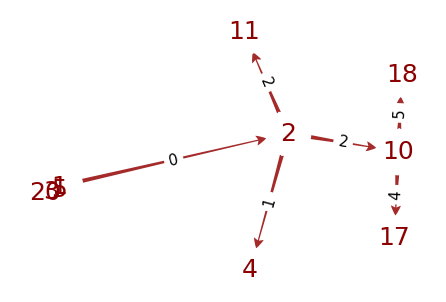

In [17]:
## class represent Node
class Node:

    def __init__(self,key):
        # self.key is the key of the node
        # self.successor are the successor nodes
        # self.weight_successor represent weight of the edges

        self.key=key
        self.successors = []
        self.weight_successors = {}

    # return key
    def getkey(self):
        return self.key

    # return successor of node

    def getsuccessor(self):
        return self.successors
    
    def addSuccessor(self,node,weight):
        # adds if successor node not exists
        if node.key() not in self.weight_successors:
            self.successors.append(node)
            self.weight_successors[node.getkey()] = weight

    # return weight of successors
    def getWeightSuccessor(self):
        return self.weight_successors

SyntaxError: ignored

In [ ]:

def run(graph, key_node_start, key_node_goal, verbose=False, time_sleep=0):
	if key_node_start not in graph.getNodes() or key_node_goal not in graph.getNodes():
		print('Error: key_node_start \'%s\' or key_node_goal \'%s\' not exists!!' % (key_node_start, key_node_goal))
	else:
		# UCS uses priority queue, priority is the cumulative cost (smaller cost)
		queue = PriorityQueue()

		# expands initial node

		# get the keys of all successors of initial node
		keys_successors = graph.getSuccessors(key_node_start)

		# adds the keys of successors in priority queue
		for key_sucessor in keys_successors:
			weight = graph.getWeightEdge(key_node_start, key_sucessor)
			# each item of queue is a tuple (key, cumulative_cost)
			queue.insert((key_sucessor, weight), weight)


		reached_goal, cumulative_cost_goal = False, -1
		while not queue.is_empty():
			# remove item of queue, remember: item of queue is a tuple (key, cumulative_cost)
			key_current_node, cost_node = queue.remove() 
			if(key_current_node == key_node_goal):
				reached_goal, cumulative_cost_goal = True, cost_node
				break

			if verbose:
				# shows a friendly message
				print('Expands node \'%s\' with cumulative cost %s ...' % (key_current_node, cost_node))
				time.sleep(time_sleep)

			# get all successors of key_current_node
			keys_successors = graph.getSuccessors(key_current_node)

			if keys_successors: # checks if contains successors
				# insert all successors of key_current_node in the queue
				for key_sucessor in keys_successors:
					cumulative_cost = graph.getWeightEdge(key_current_node, key_sucessor) + cost_node
					queue.insert((key_sucessor, cumulative_cost), cumulative_cost)

		if(reached_goal):
			print('\nReached goal! Cost: %s\n' % cumulative_cost_goal)
		else:
			print('\nUnfulfilled goal.\n')


if __name__ == "__main__":

	# build the graph...
	# adds nodes in the graph
	graph = Graph()
	graph.addNode('S') # start
	graph.addNode('a')
	graph.addNode('b')
	graph.addNode('c')
	graph.addNode('d')
	graph.addNode('e')
	graph.addNode('f')
	graph.addNode('G') # goal
	graph.addNode('h')
	graph.addNode('p')
	graph.addNode('q')
	graph.addNode('r')
	# linking the nodes
	graph.connect('S', 'd', 3)
	graph.connect('S', 'e', 9)
	graph.connect('S', 'p', 1)
	graph.connect('b', 'a', 2)
	graph.connect('c', 'a', 2)
	graph.connect('d', 'b', 1)
	graph.connect('d', 'c', 8)
	graph.connect('d', 'e', 2)
	graph.connect('e', 'h', 8)
	graph.connect('e', 'r', 2)
	graph.connect('f', 'c', 3)
	graph.connect('f', 'G', 2)
	graph.connect('h', 'p', 4)
	graph.connect('h', 'q', 4)
	graph.connect('p', 'q', 15)
	graph.connect('r', 'f', 1)

	run(graph=graph, key_node_start='S', key_node_goal='G', verbose=True, time_sleep=2)
© 2021 GitHub